### 팔요한 라이브러리 호출

In [12]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import numpy as np
import platform
# 정규식
import re

### 폰트 지정

In [19]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

### 데이터 호출

In [45]:
df = pd.read_csv('C:\project\project_2\project_2_file\z_ssh\data\전력 데이터\전력 사용량 13차.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,년월,연도,월,시도,사용량(mwh)
0,2010.10,2010,1,강원도,1480180
1,2010.10,2010,1,경기도,8725482
2,2010.10,2010,1,경상남도,2922775
3,2010.10,2010,1,경상북도,3743904
4,2010.10,2010,1,광주광역시,712924
...,...,...,...,...,...
2443,2021.12,2021,12,전라남도,2966246
2444,2021.12,2021,12,전라북도,1864342
2445,2021.12,2021,12,제주특별자치도,473291
2446,2021.12,2021,12,충청남도,4388778


In [47]:
df['년월'].astype(str)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   년월        2448 non-null   float64
 1   연도        2448 non-null   int64  
 2   월         2448 non-null   int64  
 3   시도        2448 non-null   object 
 4   사용량(mwh)  2448 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 95.8+ KB


,년월,연도,월,시도,사용량(mwh)
0,2010.10,2010,1,강원도,1480180
1,2010.10,2010,1,경기도,8725482
2,2010.10,2010,1,경상남도,2922775
3,2010.10,2010,1,경상북도,3743904
4,2010.10,2010,1,광주광역시,712924
...,...,...,...,...,...
2443,2021.12,2021,12,전라남도,2966246
2444,2021.12,2021,12,전라북도,1864342
2445,2021.12,2021,12,제주특별자치도,473291
2446,2021.12,2021,12,충청남도,4388778


In [40]:
df_5y = df[df['년월'] >= 2017.01]
df_5y

,년월,연도,월,시도,사용량(mwh)
119,2017.10,2017,1,강원도,1579863
120,2017.10,2017,1,경기도,10297551
121,2017.10,2017,1,경상남도,3192935
122,2017.10,2017,1,경상북도,4016218
123,2017.10,2017,1,광주광역시,765086
...,...,...,...,...,...
2443,2021.12,2021,12,전라남도,2966246
2444,2021.12,2021,12,전라북도,1864342
2445,2021.12,2021,12,제주특별자치도,473291
2446,2021.12,2021,12,충청남도,4388778


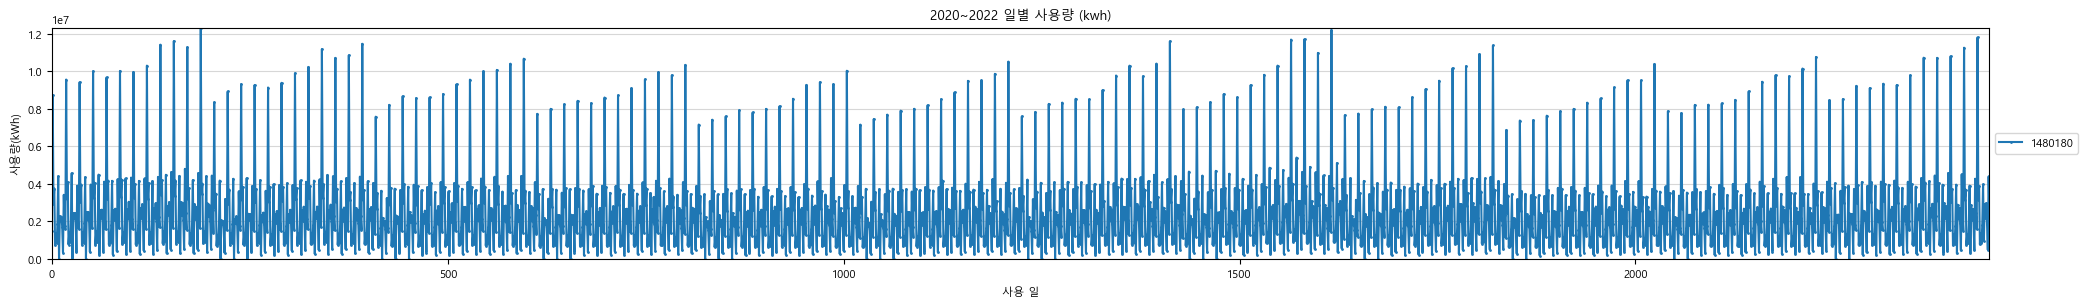

In [29]:
# 그래프 크기 설정
plt.figure(figsize=(25, 3))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df['사용량(mwh)'], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df['사용량(mwh)'], loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('2020~2022 일별 사용량 (kwh)')

# x축 레이블 설정
plt.xlabel('사용 일')

# y축 레이블 설정
plt.ylabel('사용량(kWh)')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

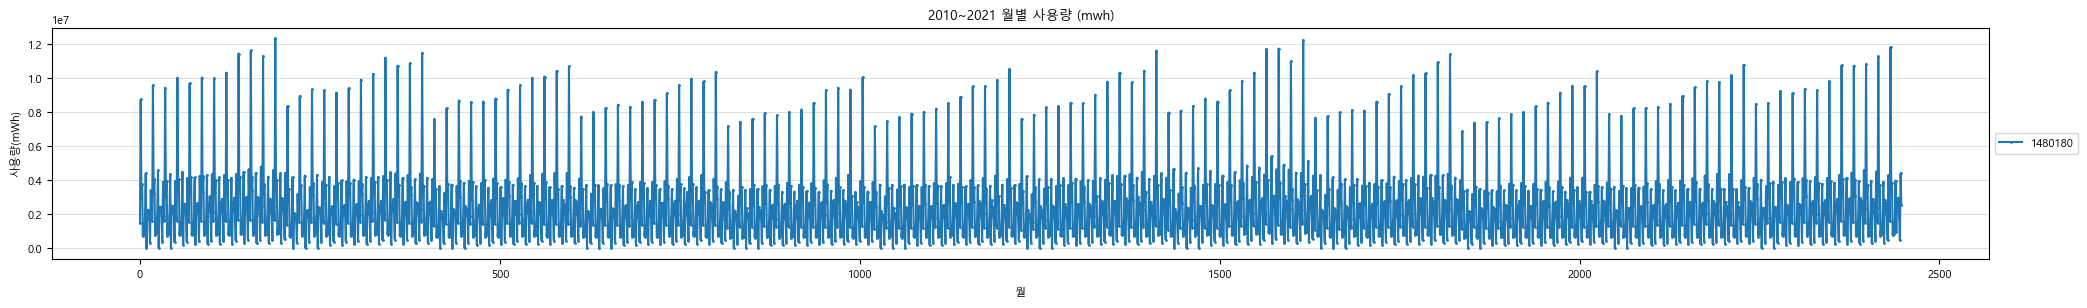

In [25]:
plt.figure(figsize = (25,3))
plt.plot(df['사용량(mwh)'], marker = 'o', markersize=1)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(df['사용량(mwh)'],
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2010~2021 월별 사용량 (mwh)')
plt.xlabel('월')
plt.ylabel('사용량(mWh)')
# plt.autoscale(axis='x', tight=True)
plt.show()

c:\Users\ssh\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  grouped_vals = vals.groupby(grouper)


ValueError: cannot reindex on an axis with duplicate labels

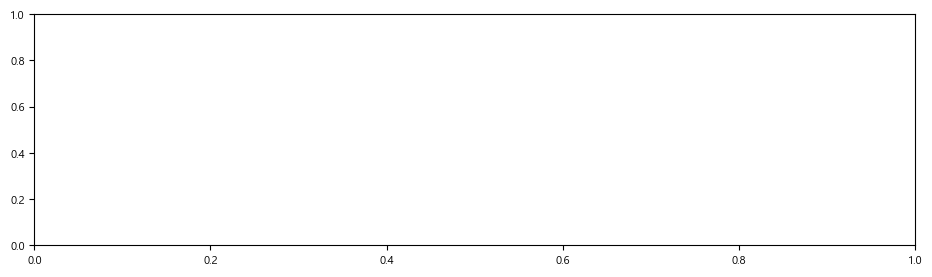

In [35]:
plt.figure(figsize=(25,3)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x=df['월'], y=df['사용량(mwh)'], data=df['사용량(mwh)'], showfliers=False)
g.set_title('일별 전력 사용량', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(df['사용량(mwh)'].groupby(df['월'])['사용량(mwh)'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('일별 전력 사용량 중앙값', size = 20)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

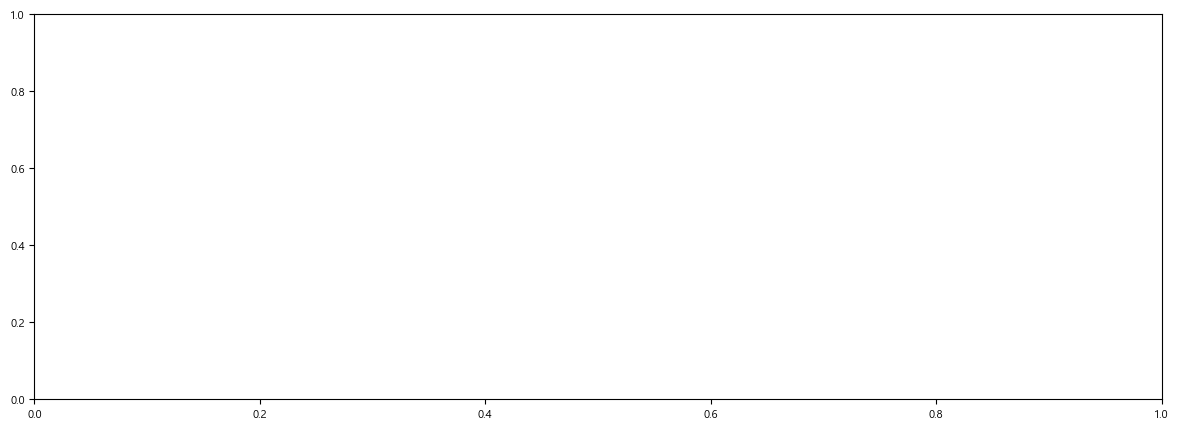

In [38]:
# boxplot 그래프확인
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x=['월'], y=['사용량'], data = df, showfliers=False)
ax.xaxis.set_major_locator(plt.MultipleLocator(15))

plt.figure(figsize=(32,5), ) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
plt.xlabel(xlabel = '운량')
ax = sns.boxplot(x='cloud', y='kwh', data = df, showfliers=False)

plt.show()